<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>1. Imports and Setup</h2>
  <p>
    In this step, we import the essential libraries for building and understanding Convolutional Neural Networks (CNNs).
  </p>
  <ul>
    <li><span class="code-inline">numpy</span>: Used for numerical operations and creating synthetic image data.</li>
    <li><span class="code-inline">matplotlib.pyplot</span>: Used to visualize the images and filters.</li>
    <li><span class="code-inline">torch</span> & <span class="code-inline">torch.nn</span>: The core PyTorch modules for building neural networks.</li>
    <li><span class="code-inline">scipy.signal.convolve2d</span>: A tool for performing 2D convolution. We use this to demonstrate the math "from scratch" before switching to PyTorch.</li>
  </ul>
</div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from scipy.signal import convolve2d



<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>2. Visualizing Inputs</h2>
  <p>
    To understand CNNs, we must remember that a computer sees images as <strong>matrices of numbers</strong>.
  </p>
  <p>
    Here, we define a helper function <span class="code-inline">plot_comparison</span> to compare images. Then, we generate a synthetic <strong>10x10 pixel image</strong> with a black background (0) and a white central square (1). This contrast allows us to clearly see how filters react to "edges."
  </p>
</div>

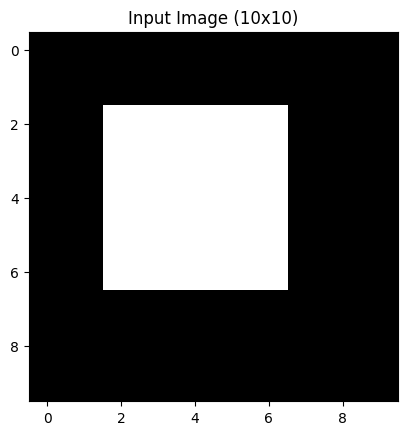

In [8]:


def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(filtered, cmap='gray')
    ax2.set_title(title_filtered)
    ax2.axis('off')
    plt.show()

# 1. Create a simple synthetic image (A white square on a black background)
image = np.zeros((10, 10))
image[2:7, 2:7] = 1

plt.imshow(image, cmap='gray')
plt.title("Input Image (10x10)")
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>3. The Convolution Operation</h2>
  <p>
    A <strong>Kernel</strong> (or filter) is a small matrix that "slides" over the input image. At every position, it performs a dot product. The result is a new grid called a <strong>Feature Map</strong>.
  </p>
  <p>
    We define a <strong>Vertical Edge Detector</strong> kernel: <span class="code-inline">[[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]</span>.
  </p>
  <p><strong>How it works:</strong></p>
  <ul>
    <li>When <span class="code-inline">-1</span> is on a bright pixel and <span class="code-inline">1</span> on a dark pixel, the result is high.</li>
    <li>When the kernel is over a solid color, the values cancel out to <strong>0</strong> (black).</li>
  </ul>
  <p>This effectively "highlights" the vertical boundaries of our square.</p>
</div>

Kernel (Filter):
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


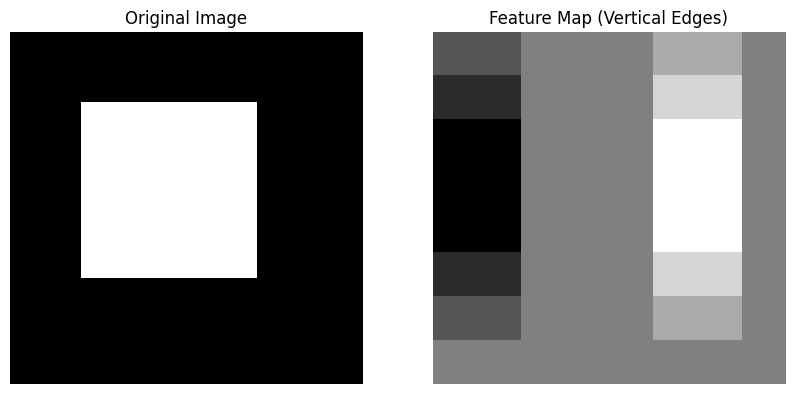

In [9]:
# Define a Vertical Edge Detector Filter
# This filter detects sharp changes from light to dark horizontally
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

print("Kernel (Filter):\n", kernel)

# Apply Convolution (mode='valid' means no padding)
output = convolve2d(image, kernel, mode='valid')

plot_comparison(image, output, 'Feature Map (Vertical Edges)')

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>4. Understanding Stride & Padding</h2>
  <p>
    Two hyperparameters control the output dimensions of a layer:
  </p>
  <ul>
    <li><strong>Padding (<span class="code-inline">P</span>):</strong> Adding a border of pixels (usually zeros) around the image. This maintains spatial dimensions (Input Width = Output Width).</li>
    <li><strong>Stride (<span class="code-inline">S</span>):</strong> The step size of the filter. A stride of <strong>2</strong> skips every other pixel, effectively <strong>downsampling</strong> the image by half.</li>
  </ul>
  <p>
    The output size formula is: <br>
    <span class="code-inline">Output = ((Input - Kernel + 2*Padding) / Stride) + 1</span>
  </p>
</div>

In [10]:
def calculate_output_shape(input_size, kernel_size, stride, padding):
    output_size = ((input_size - kernel_size + (2 * padding)) / stride) + 1
    return output_size

# Example 1: Maintaining Dimensions
# Input: 32x32, Kernel: 3x3, Padding: 1, Stride: 1
out = calculate_output_shape(32, 3, 1, 1)
print(f"Input: 32 -> Output: {out}")  # Should be 32.0

# Example 2: Downsampling
# Input: 32x32, Kernel: 3x3, Padding: 1, Stride: 2
out_downsampled = calculate_output_shape(32, 3, 2, 1)
print(f"Input: 32 (Stride=2) -> Output: {out_downsampled}") # Should be 16.0

Input: 32 -> Output: 32.0
Input: 32 (Stride=2) -> Output: 16.5


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>5. Pooling Layers</h2>
  <p>
    <strong>Pooling</strong> reduces the size of feature maps, lowering computational cost and making the model robust to small movements.
  </p>
  <p>
    <strong>Max Pooling</strong> looks at a small window (e.g., 2x2) and keeps only the <strong>maximum value</strong>. In the example below, a 4x4 matrix is shrunk to 2x2, but the most significant features (the largest numbers) are preserved.
  </p>
</div>

In [11]:
# Create a random 4x4 matrix
feature_map = torch.tensor([
    [1., 3., 2., 4.],
    [5., 6., 1., 2.],
    [8., 7., 3., 0.],
    [2., 1., 4., 5.]
]).unsqueeze(0) # Add batch dimension -> (1, 4, 4)

print("Feature Map before Pooling:\n", feature_map.squeeze())

# Apply Max Pooling with a 2x2 window
pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)
pooled_output = pool_layer(feature_map)

print("\nFeature Map after Max Pooling (2x2):\n", pooled_output.squeeze())
# Notice dimensions reduced from 4x4 to 2x2, keeping only the largest numbers.

Feature Map before Pooling:
 tensor([[1., 3., 2., 4.],
        [5., 6., 1., 2.],
        [8., 7., 3., 0.],
        [2., 1., 4., 5.]])

Feature Map after Max Pooling (2x2):
 tensor([[6., 4.],
        [8., 5.]])


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>6. PyTorch Implementation </h2>
  <p>
    Finally, we move to the professional approach using <strong>PyTorch</strong>.
  </p>
  <ul>
    <li><strong>MPS (Metal Performance Shaders):</strong> We check for <span class="code-inline">torch.backends.mps.is_available()</span> to ensure training runs on Mac's GPU.</li>
    <li><strong>nn.Conv2d:</strong> The standard CNN layer. We set <span class="code-inline">in_channels=1</span> (grayscale) and <span class="code-inline">out_channels=16</span> (learning 16 different filters).</li>
  </ul>
  <p>
    We pass a "dummy" input through the layer to verify the output shape matches our expectations.
  </p>
</div>

In [12]:
# Check for Apple M2 GPU acceleration (MPS Backend)
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("✅ Success: Using Apple GPU (MPS backend)")
else:
    device = torch.device("cpu")
    print("⚠️ Warning: Using CPU")

# Define a Convolutional Layer
# in_channels=1 (Grayscale input)
# out_channels=16 (The layer will learn 16 different filters)
conv_layer = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1, stride=1).to(device)

# Create a random dummy input (Batch=1, Channels=1, Height=64, Width=64)
dummy_input = torch.randn(1, 1, 64, 64).to(device)

# Pass input through the layer
with torch.no_grad():
    output = conv_layer(dummy_input)

print("\nShape of Input:", dummy_input.shape)
print("Shape of Output:", output.shape)
# Output should be (1, 16, 64, 64) because we used 16 filters and padding preserved dimensions.

✅ Success: Using Apple GPU (MPS backend)

Shape of Input: torch.Size([1, 1, 64, 64])
Shape of Output: torch.Size([1, 16, 64, 64])


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>7. Theory: The Hierarchy of Features</h2>
  <p>
    A single Convolutional Layer can only see small patterns (like vertical or horizontal edges). So how does a CNN recognize a complex object like a "cat" or a "bottle"?
  </p>
  <p><strong>The answer is Hierarchy:</strong></p>
  <ul>
    <li><strong>Layer 1:</strong> Detects simple <strong>Edges</strong> (lines, curves).</li>
    <li><strong>Layer 2:</strong> Combines edges to detect <strong>Shapes</strong> (circles, corners, squares).</li>
    <li><strong>Layer 3:</strong> Combines shapes to detect <strong>Parts</strong> (eyes, wheels, caps).</li>
    <li><strong>Layer 4:</strong> Combines parts to detect <strong>Objects</strong> (faces, cars, bottles).</li>
  </ul>
  <p>
    This is why Deep Learning is "Deep." We stack layers to build increasingly complex understandings of the image.
  </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>8. Theory: Learning the Weights</h2>
  <p>
    In our code above, we manually defined the kernel <span class="code-inline">[[-1, 0, 1]...]</span> to detect vertical edges.
  </p>
  <p>
    In a real CNN, <strong>we do not define the kernels.</strong> Instead, we initialize the kernels with random numbers.
  </p>
  <p>
    During training (Backpropagation), the network looks at the errors it makes and automatically adjusts the numbers in the kernels. It might learn on its own that "Kernel 1" should be a vertical edge detector and "Kernel 2" should be a diagonal edge detector because those are the most useful features for solving the specific problem.
  </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>9. Theory: The Role of ReLU</h2>
  <p>
    Convolution is a linear math operation (multiplication and addition). If we only used convolutions, the network would just be one big linear regression model, incapable of learning complex patterns.
  </p>
  <p>
    To fix this, we apply an <strong>Activation Function</strong> after every convolution. The most common is <strong>ReLU (Rectified Linear Unit)</strong>.
  </p>
  <p>
    <strong>Formula:</strong> <span class="code-inline">f(x) = max(0, x)</span>
  </p>
  <p>
    It simply turns all negative numbers to 0. This implies: "If the pattern matches (positive value), keep it. If it doesn't match (negative value), discard it." This simple operation is what allows neural networks to learn non-linear, complex data.
  </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;       /* Dark Blue-Grey Background */
        color: #cdd6f4;                  /* Soft White Text */
        border-left: 6px solid #89b4fa;  /* Blue Accent Border */
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        
        /* FIXES: */
        box-sizing: border-box;          /* Includes padding in width calculation */
        max-width: 100%;                 /* Prevents box from exceeding screen width */
        overflow-wrap: break-word;       /* Forces long words to wrap */
        word-wrap: break-word;           /* Legacy support for wrapping */
    }
    
    /* Header style */
    .note-box h2 {
        color: #89b4fa;                  /* Blue Header */
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }

    /* Important keywords */
    .note-box strong {
        color: #f9e2af;                  /* Soft Gold/Yellow for emphasis */
        font-weight: 600;
    }

    /* Inline code snippets */
    .note-box .code-inline {
        background-color: #313244;       /* Slightly lighter background */
        color: #f38ba8;                  /* Soft Red/Pink for code terms */
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
        
        /* FIXES for code: */
        white-space: pre-wrap;           /* Allows code to wrap on multiple lines */
        word-break: break-word;          /* Breaks long variables if necessary */
    }

    /* Lists */
    .note-box ul {
        padding-left: 20px;
        margin: 10px 0;
    }
    .note-box li {
        margin-bottom: 8px;
    }
</style>
<div class="note-box">
  <h2>10. Theory: From Maps to Categories</h2>
  <p>
    After the final Pooling layer, the network has a small, dense grid of "high-level features" (e.g., "Is there a handle? Yes. Is there a spout? Yes.").
  </p>
  <p>
    To make a final classification (e.g., "Teapot"), we must change formats:
  </p>
  <ol>
    <li><strong>Flatten:</strong> We unroll the 2D matrices into a long 1D vector (a list of numbers).</li>
    <li><strong>Fully Connected Layer (Linear):</strong> We feed this vector into a standard Neural Network (MLP).</li>
    <li><strong>Softmax:</strong> The final output is converted into probabilities (e.g., 80% Teapot, 15% Cup, 5% Vase).</li>
  </ol>
</div>